<a href="https://colab.research.google.com/github/mcagriaksoy/Pneumonia_Detector_for_covid19/blob/master/CNN_Pneumonia_Detector_for_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
#github.com/mcagriaksoy
# Mehmet Cagri Aksoy - 2021

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:

from __future__ import absolute_import, division, print_function, unicode_literals


Google Colaboratory Environment is only supporting tensorflow 1.x so that we define this:


In [144]:
try:
  %tensorflow_version 1.x
except Exception:
  pass
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


Other Definitions:

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
sns.set()
import numpy as np # linear algebra
 # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  *
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import DenseNet121, VGG19, ResNet50
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import PIL.Image
import matplotlib.pyplot as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [146]:
# Define path to the data directory
datasetDir = "drive/MyDrive/COVID-19/dataset/"

train_dir = os.path.join(datasetDir, 'train')
validation_dir = os.path.join(datasetDir, 'validation')

train_normal_dir = os.path.join(train_dir, 'normal')  
train_covid_dir = os.path.join(train_dir, 'covid')

validation_normal_dir = os.path.join(validation_dir, 'normal') 
validation_covid_dir = os.path.join(validation_dir, 'covid') 


In [147]:
batch_size = 16
epochs = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

Data augmentation is applied to my dataset to increase data size.

In [148]:
image_gen_train = ImageDataGenerator(
                rotation_range=15,
                width_shift_range=0.05,
                height_shift_range=0.05,
                rescale=1./255,
                shear_range=0.1,
                fill_mode='nearest')

image_gen_val = ImageDataGenerator(rescale=1./255)

Train Data generation

In [149]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 593 images belonging to 2 classes.


Validation Data generation

In [150]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 80 images belonging to 2 classes.


In here, sample images are taken from the dataset and via the function of showImages, plot images in the form of listing 5 images.

In [151]:
sample_training_images, _ = next(train_data_gen)

def showImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


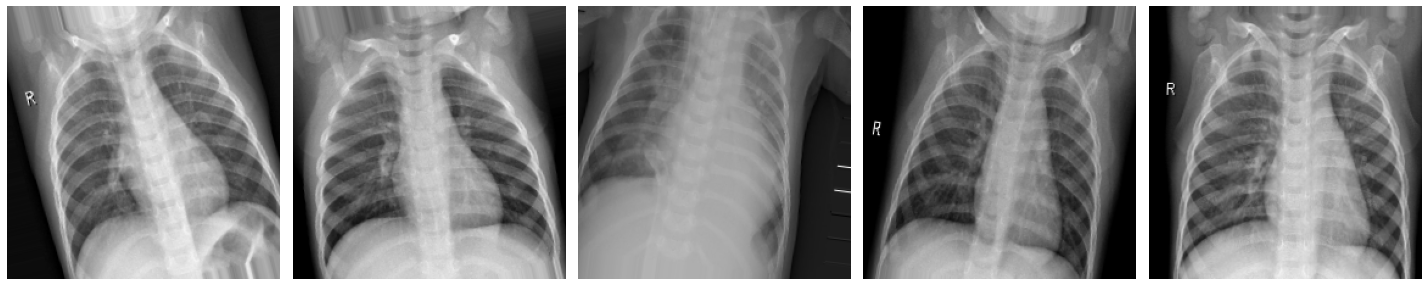

In [152]:
showImages(sample_training_images[:5])

The model:

In [153]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

Mehmet Çağrı Aksoy

Model configuration settings are described:

* ADAM optimizer is used.
* binary_crossentropy loss method is used.
* metrics are described as their accuracies.

In [154]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)


Epoch 1/100
37/37 [==============================] - 24s 584ms/step - loss: 0.8635 - accuracy: 0.3905 - val_loss: 0.7826 - val_accuracy: 0.3625
Epoch 2/100
37/37 [==============================] - 16s 429ms/step - loss: 0.8268 - accuracy: 0.4550 - val_loss: 0.7856 - val_accuracy: 0.4000
Epoch 3/100
37/37 [==============================] - 16s 432ms/step - loss: 0.8897 - accuracy: 0.4022 - val_loss: 0.7871 - val_accuracy: 0.4375
Epoch 4/100
37/37 [==============================] - 16s 429ms/step - loss: 0.7911 - accuracy: 0.4920 - val_loss: 0.7882 - val_accuracy: 0.4250
Epoch 5/100
37/37 [==============================] - 16s 428ms/step - loss: 0.7960 - accuracy: 0.4500 - val_loss: 0.7906 - val_accuracy: 0.4250
Epoch 6/100
37/37 [==============================] - 16s 432ms/step - loss: 0.8220 - accuracy: 0.4429 - val_loss: 0.7930 - val_accuracy: 0.4250
Epoch 7/100
37/37 [==============================] - 16s 432ms/step - loss: 0.7703 - accuracy: 0.4875 - val_loss: 0.7930 - val_accuracy:

Augmented solution

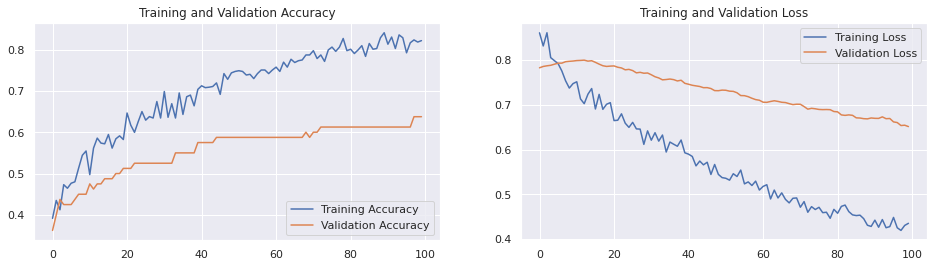

In [155]:
acc1 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Without Augmented Data Block:

In [156]:
without_aug_image_gen_train = ImageDataGenerator()
without_aug_image_gen_val = ImageDataGenerator()

Train Data generation

In [157]:
without_aug_train_data_gen = without_aug_image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 593 images belonging to 2 classes.


Validation Data generation

In [158]:
without_aug_val_data_gen = without_aug_image_gen_val.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 80 images belonging to 2 classes.


In [159]:
base_model.trainable = False
model2 = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

base_learning_rate = 0.00001
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)


Epoch 1/100
37/37 [==============================] - 19s 451ms/step - loss: 0.9501 - accuracy: 0.4126 - val_loss: 0.7341 - val_accuracy: 0.5500
Epoch 2/100
37/37 [==============================] - 16s 425ms/step - loss: 0.8892 - accuracy: 0.4486 - val_loss: 0.7116 - val_accuracy: 0.5625
Epoch 3/100
37/37 [==============================] - 16s 428ms/step - loss: 0.8825 - accuracy: 0.4335 - val_loss: 0.6936 - val_accuracy: 0.5875
Epoch 4/100
37/37 [==============================] - 16s 431ms/step - loss: 0.8686 - accuracy: 0.4058 - val_loss: 0.6802 - val_accuracy: 0.5750
Epoch 5/100
37/37 [==============================] - 16s 433ms/step - loss: 0.8089 - accuracy: 0.4872 - val_loss: 0.6700 - val_accuracy: 0.5875
Epoch 6/100
37/37 [==============================] - 16s 435ms/step - loss: 0.8054 - accuracy: 0.4812 - val_loss: 0.6614 - val_accuracy: 0.6125
Epoch 7/100
37/37 [==============================] - 16s 434ms/step - loss: 0.7966 - accuracy: 0.4487 - val_loss: 0.6557 - val_accuracy:

Without augmentation solution

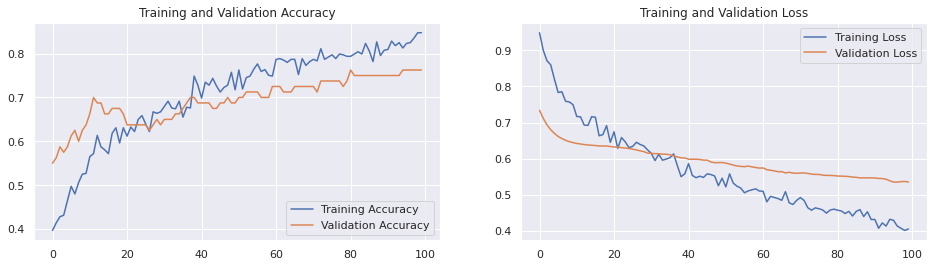

In [160]:
acc1 = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prediction Part
This part is representing the part of the exam question of 3
I'm manually adding the image for testing the model behaviour.

In [230]:
test_img_loc = '/content/Image_covid1.jpeg'
#Resizing the image due to Question 3-Part-A
test_image = image.load_img(test_img_loc, target_size = (IMG_HEIGHT, IMG_WIDTH))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
images = np.vstack([test_image])
covid19_possibility = model.predict(images, batch_size=batch_size)
print ("The percentage of the covid19 possibility:", covid19_possibility)
if covid19_possibility[0] > 0.4:
  print('Pneumonia Found. / Possible Covid-19')
else:
  print('The person is healthly.')



AttributeError: ignored

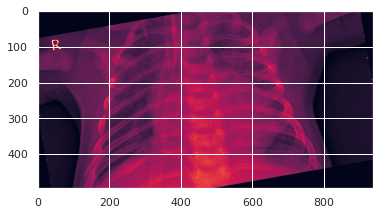

In [227]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(test_img_loc)
#Rotates 10 degree for the Part B Q:3

img = img.rotate(10) 
implot = plt.imshow(img)
plt.show()


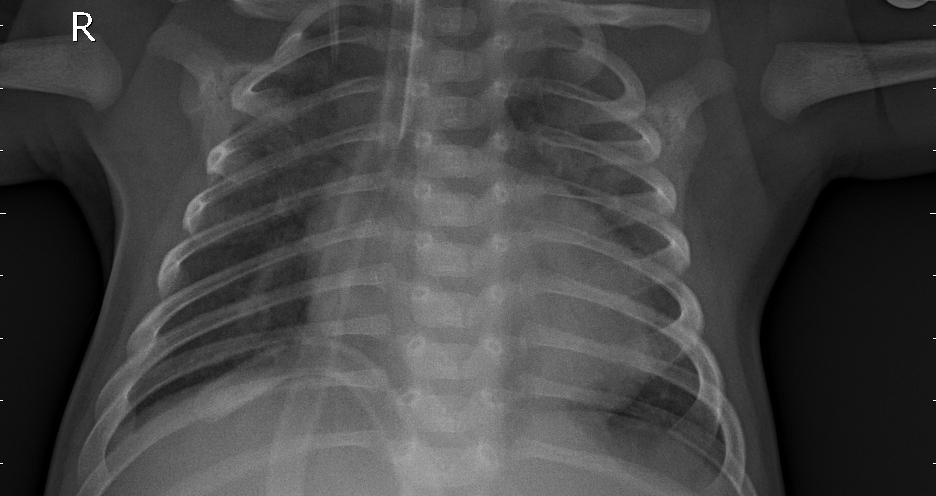

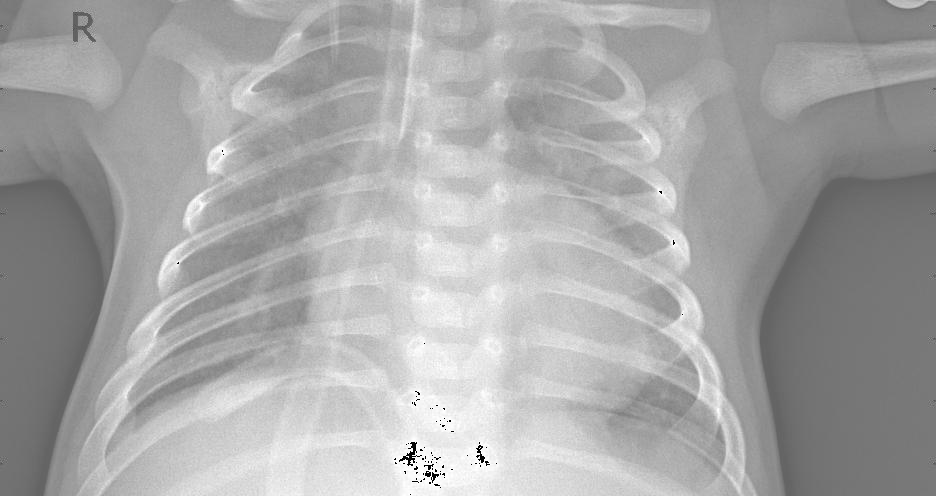

In [210]:
#For Part C of Question 3:
from google.colab.patches import cv2_imshow
import numpy as np

img1 = cv2.imread(test_img_loc)
a = np.double(img1)
b = a + 100
img2 = np.uint8(b)
cv2_imshow(img1)
cv2_imshow(img2)
